# Linear regression: prediction error and more

##### Libraries

In [2]:
## Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import scipy.stats as ss

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # makes figs nicer!

## Goals of this lecture
 
- Extracting model **predictions**.
- Basic model evaluation: 
   - Visualizing $\hat{Y}$ vs. $Y$.
   - $RSS$: residual sum of squares. 
   - $S_{Y|X}$: standard error of the estimate.  
      - Using $S_{Y|X}$ to calculate **standard error** for our coefficients.
   - $R^2$: coefficient of determination.  
- Homoscedasticity. 

## Models as *predictors*

### Modeling our data

> A **statistical model** is a mathematical model representing a "data-generating process".

This means we can use a model to **generate predictions** for some value of $X$. 

$\Large \hat{Y} = f(X, \beta)$

In [3]:
df_income = pd.read_csv("data/models/income.csv")
df_income.head(3)

,Education,Seniority,Income
0,21.586207,113.103448,99.917173
1,18.275862,119.310345,92.579135
2,12.068966,100.689655,34.678727


### Predictions from a linear model

> **Predictions** from a linear model can be obtained by "plugging in" some value of $X$ to the linear equation with **fit model parameters** ($\beta_0$, $\beta_1$).

In [4]:
mod_edu = smf.ols(data = df_income, formula = "Income ~ Education").fit()
mod_edu.params

Intercept   -41.916612
Education     6.387161
dtype: float64

Here, the linear equation would be written:

$Y = -41.92 + 6.39 * X_1 + \epsilon$

In [5]:
X = 10
-41.92 + 6.39 * X ## predicted income when X = 10

21.979999999999997

### Predictions using `statsmodels`

- Instead of generating predictions *by hand*, you can use the `predict` function in `statsmodels`.  
- By default, this will generate predictions for all of the *original* values of $X$.

In [7]:
mod_edu.predict()

array([95.95797131, 74.81426521, 35.16981627, 66.88537542, 85.38611826,
       74.81426521, 85.38611826, 93.31500804, 88.02908152, 21.95499996,
       45.74166932, 77.45722847, 32.52685301, 64.24241216, 21.95499996,
       88.02908152, 48.38463259, 64.24241216, 64.24241216, 88.02908152,
       74.81426521, 51.02759585, 69.52833868, 24.59796322, 95.95797131,
       29.88388975, 85.38611826, 32.52685301, 35.16981627, 66.88537542])

### `predict()` for new data?

You can also use `predict()` for **new data**––it just needs to be represented as a `DataFrame` with the appropriate columns.

In [8]:
## Create new DataFrame
new_data = pd.DataFrame({'Education': [10, 25, 35]})
mod_edu.predict(new_data)

0     21.955000
1    117.762418
2    181.634030
dtype: float64

## Model *evaluation*

Once we've built a model, we want to **evaluate it**: how *good* is this model?

We'll discuss several ways to evaluate our linear model:

- **Visually**: plotting $\hat{Y}$ or the **residuals** of the model.  
- **Evaluation metrics**: $RSS$, $MSE$, and $S_{Y|X}$

### Visual comparisons

We can use **data visualizations** to evaluate the success of our model. 

There are a few ways to do this:

1. Plotting $\hat{Y}$ as the regression line over `Income` and `Education`.  
2. Directly plotting $\hat{Y}$ vs. $Y$.  
3. Plotting the **residuals** of our model.

#### Plotting $\hat{Y}$ over the regression line

Text(0, 0.5, 'Income')

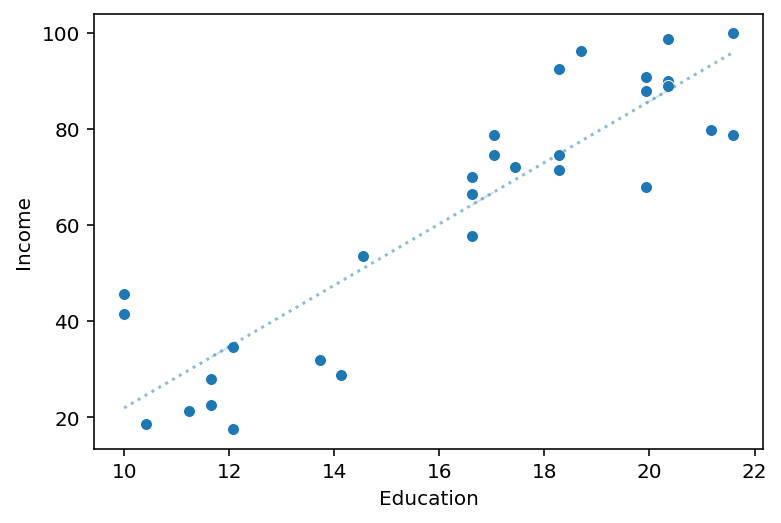

In [9]:
y_pred = mod_edu.predict()
sns.scatterplot(x = df_income['Education'], y = df_income['Income'])
sns.lineplot(x = df_income['Education'], y = y_pred, alpha = .5, linestyle = "dotted")
plt.xlabel("Education")
plt.ylabel("Income")

#### Comparing $\hat{Y}$ to $Y$ directly

If we had a perfect model, $\hat{Y}$ should be *identical* to $Y$.

Text(0, 0.5, 'Real values: $Y$')

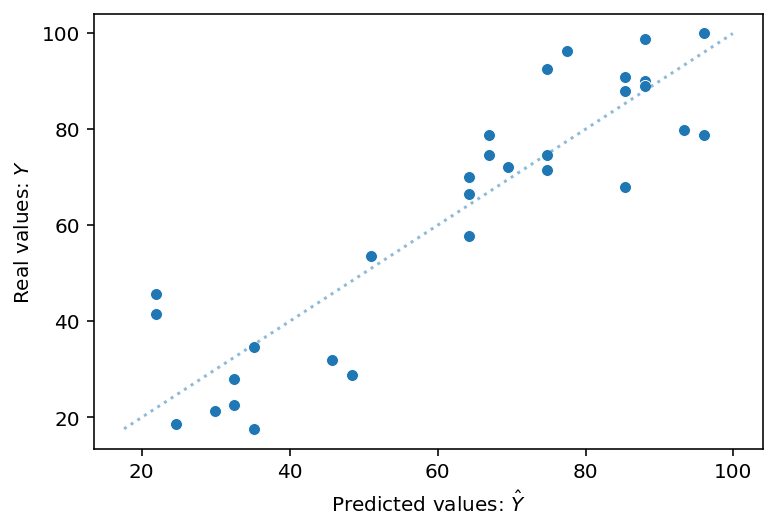

In [10]:
y_pred = mod_edu.predict()
sns.scatterplot(x = y_pred, y = df_income['Income'])
sns.lineplot(x = df_income['Income'], y = df_income['Income'], alpha = .5, linestyle = "dotted")
plt.xlabel("Predicted values: $\hat{Y}$")
plt.ylabel("Real values: $Y$")

#### Plotting *residuals*

> The **residuals** of a model are the *difference* between each predicted value $\hat{Y}$ and real value $Y$.

- We can calculate the residuals directly: $\hat{Y} - Y$.
- Or we can access them using `mod.resid`.

Text(0, 0.5, 'Residuals')

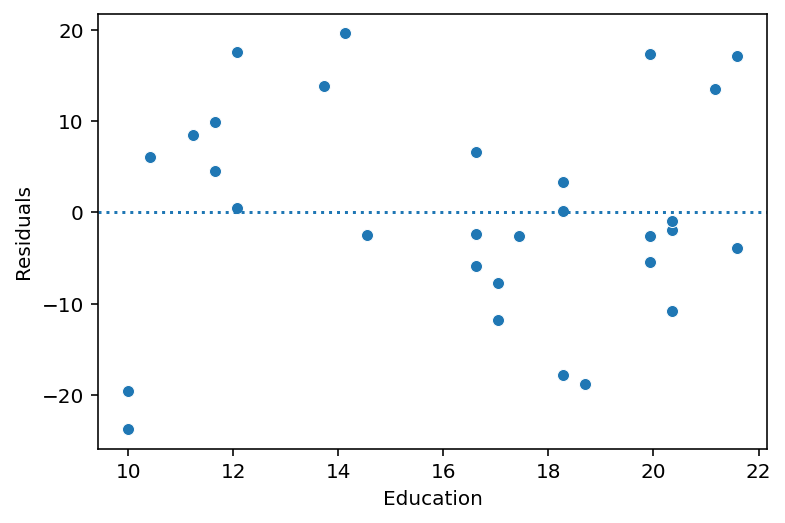

In [11]:
resid = y_pred - df_income['Income'].values ### calculate residuals
sns.scatterplot(x = df_income['Education'], y = resid)
plt.axhline(y = 0, linestyle = "dotted")
plt.ylabel("Residuals")

#### Check-in

Build a linear model predicting `Income` from `Seniority`. Then, evaluate this model using one of the visual comparison methods discussed above:

1. Plotting $\hat{Y}$ as the regression line over `Income` and `Education`.  
2. Directly plotting $\hat{Y}$ vs. $Y$.  
3. Plotting the **residuals** of our model.

In [12]:
### Your code here

#### Solution (1)

<AxesSubplot:xlabel='Seniority', ylabel='Income'>

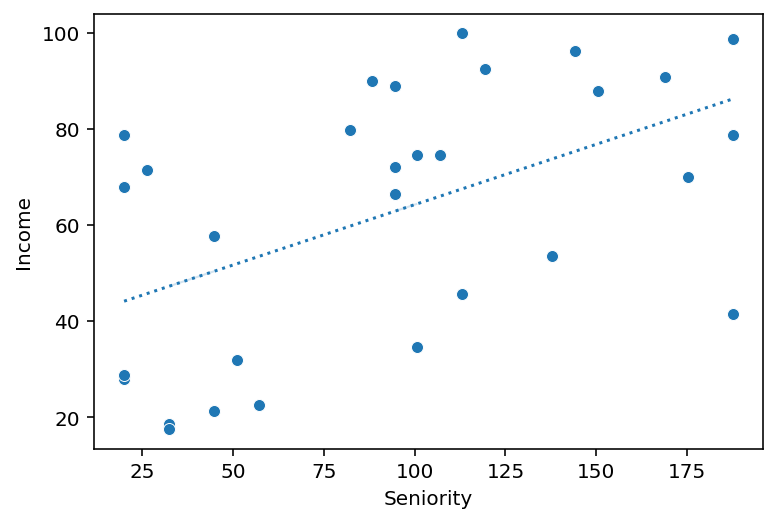

In [13]:
mod_seniority = smf.ols(data = df_income, formula = "Income ~ Seniority").fit()
sns.scatterplot(x = df_income['Seniority'], y = df_income['Income'])
sns.lineplot(x = df_income['Seniority'], y = mod_seniority.predict(), linestyle = "dotted")

#### Solution (2)

Text(0, 0.5, 'Real values: $Y$')

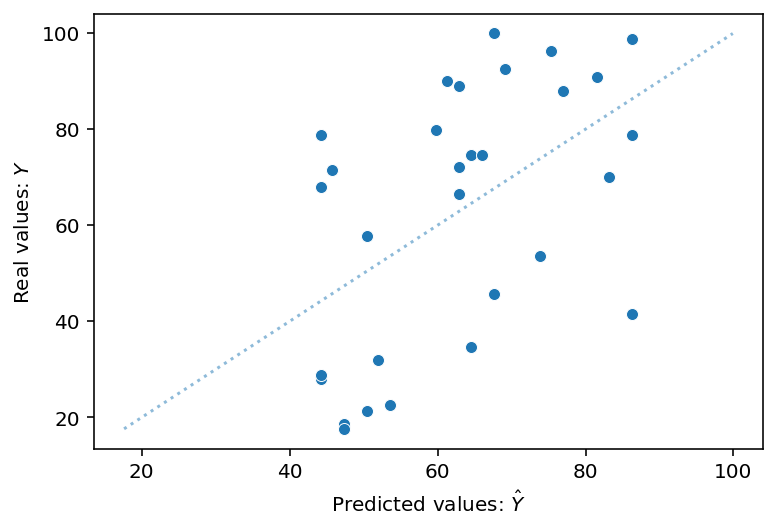

In [14]:
sns.scatterplot(x = mod_seniority.predict(), y = df_income['Income'])
sns.lineplot(x = df_income['Income'], y = df_income['Income'], alpha = .5, linestyle = "dotted")
plt.xlabel("Predicted values: $\hat{Y}$")
plt.ylabel("Real values: $Y$")

#### Solution (3)

Text(0, 0.5, 'Residuals')

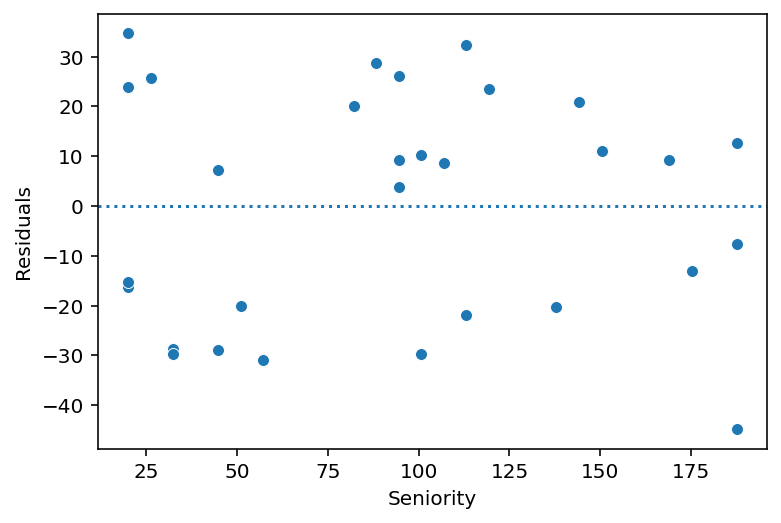

In [15]:
sns.scatterplot(x = df_income['Seniority'], y = mod_seniority.resid)
plt.axhline(y = 0, linestyle = "dotted")
plt.ylabel("Residuals")

### Calculating $RSS$

> The **residual sum of squares** is the sum of squared deviations between each prediction and the real values of $Y$.

$RSS = \sum_i^N (\hat{y}_i - y_i)^2$

**Note**: A higher value is worse (i.e., more error).

In [17]:
### define a helper function!
def rss(y_pred, y):
    return sum((y_pred - y)**2)

In [18]:
## RSS for "Education" model
rss(mod_edu.predict(), df_income['Income'])

3982.5065854722675

#### Check-in

Calculate the $RSS$ for your `Seniority` model. Is it better or worse? Does this match your intuition from the visual comparisons?

In [19]:
### Your code here

#### Solution

In [20]:
## RSS for "Seniority" model
rss(mod_seniority.predict(), df_income['Income'])

15477.269661883036

#### Visually comparing $RSS$

<AxesSubplot:xlabel='Predictor', ylabel='RSS'>

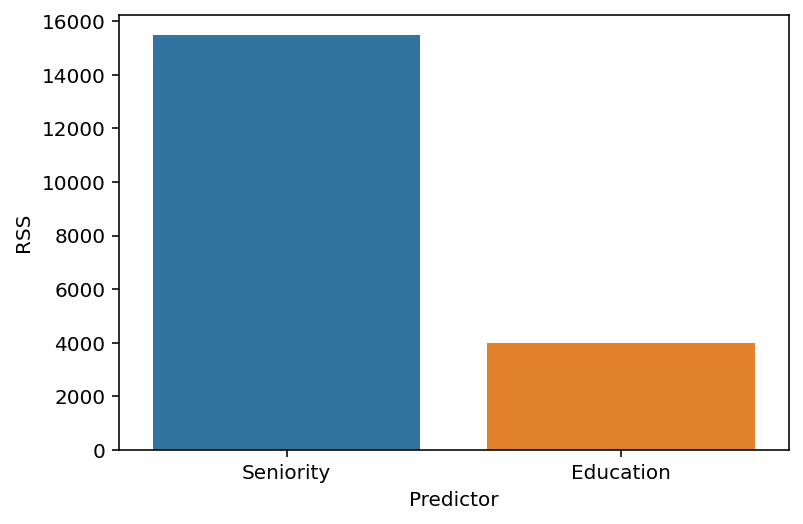

In [22]:
rss_seniority = rss(mod_seniority.predict(), df_income['Income'])
rss_education = rss(mod_edu.predict(), df_income['Income'])
df_rss = pd.DataFrame({'RSS': [rss_seniority, rss_education],
                      'Predictor': ['Seniority', 'Education']})
sns.barplot(data = df_rss, x = "Predictor", y = "RSS")

### Calculating $MSE$

> The **mean squared error** is the $RSS$ divided by the number of data points.

$MSE = \frac{1}{N}*\sum_i^N (\hat{y}_i - y_i)^2$

**Note**: A higher value is worse (i.e., more error).

In [25]:
### define a helper function!
def mse(y_pred, y):
    return (sum((y_pred - y)**2)) / (len(y))

In [26]:
## RSS for "Education" model
mse(mod_edu.predict(), df_income['Income'])

132.75021951574226

#### Check-in

Calculate the $MSE$ for your `Seniority` model. Is it better or worse? Does this match your intuition from the visual comparisons?

In [27]:
### Your code here

#### Solution

In [28]:
## RSS for "Seniority" model
mse(mod_seniority.predict(), df_income['Income'])

515.9089887294346

### Calculating $S_{Y|X}$

> The **standard error of the estimate** is a measure of the *expected prediction error*, i.e., how much your predictions are "wrong" on average. 

$\Large S_{Y|X} = \sqrt{\frac{RSS}{n-2}}$

- How much, on average, do we expect $\hat{Y}$ to deviate from $Y$? 
- As before, **a smaller number means better fit**.

In [29]:
### Calculating directly
np.sqrt(rss(mod_edu.predict(), df_income['Income']) / (len(df_income) - 2))

11.926121668530007

#### Calculating using `statsmodels`

A **fit model** in `statsmodels` also gives us a `scale` parameter; the *square root* of this parameter is $S_{Y|X}$.

In [30]:
mod_edu.scale ## model variance

142.23237805258097

In [31]:
np.sqrt(mod_edu.scale) ## standard error of the estimate

11.926121668530007

#### Reporting $S_{Y|X}$

We can report the **standard error of the estimate** by attaching it to our predictions, such as:

> For an individual with $10$ years of education, we predict a salary of $21.96, \pm 11.93$.  

#### Check-in

What is the standard error of the estimate for the `Seniority` model? Is it higher or lower than the one for the `Education` model? What does this mean with respect to our prediction accuracy?

In [32]:
### Your code here

#### Solution

In [33]:
np.sqrt(mod_seniority.scale)

23.510840707672212

### $R^2$: how much variance is explained?

> The $R^2$, or **coefficient of determination**, measures the *proportion of variance* in $Y$ explained by the model.

$\Large R^2 = 1 - \frac{RSS}{SS_{Y}}$

**Check-in**: Why is this a sensible formula for calculating the proportion of variance in $Y$ explained by the model?

#### Decomposing $R^2$ (pt. 1)

First, consider the terms in the fraction:

- $RSS$: *Leftover* variance in $Y$ after fitting the model.  
- $SS_Y$: *Total* variance in $Y$ (i.e., *before* fitting the model).

Thus, $\frac{RSS}{SS_{Y}} = 1$ would mean the model hasn't explained anything, while $\frac{RSS}{SS_{Y}} = 0$ would mean there's $0$ leftover variance after fitting the model. 


#### Decomposing $R^2$ (pt. 2)

So $\frac{RSS}{SS_{Y}}$ gives us the ratio of *leftover variance* to *Total variance*.

This means that subtracting $1 - \frac{RSS}{SS_{Y}}$ gives us the proportion of **variance explained** by the model (i.e., the *inverse* of the leftover variance).

- $R^2 = 0$ means the model hasn't explained anything.
- $R^2 = 1$ means there's $0$ leftover variance.

#### Extracting $R^2$

We can extract $R^2$ directly from the fit model.

In [34]:
### What does this R^2 value mean?
mod_edu.rsquared

0.8118068966722579

#### Check-in

Extract the $R^2$ for your `Seniority` model. What is it? How does it compare to the $R^2$ for the `Education` model?

In [35]:
### Your code here

#### Solution

In [36]:
### What does this R^2 value mean?
mod_seniority.rsquared

0.2686225757076368

### Comparing three models

Now, let's compare $3$ different models:

1. An `Intercept`-only model, i.e., with *no predictors*.  
2. The model with `Seniority`.  
3. The model with `Education`.

<AxesSubplot:xlabel='Predictors', ylabel='R2'>

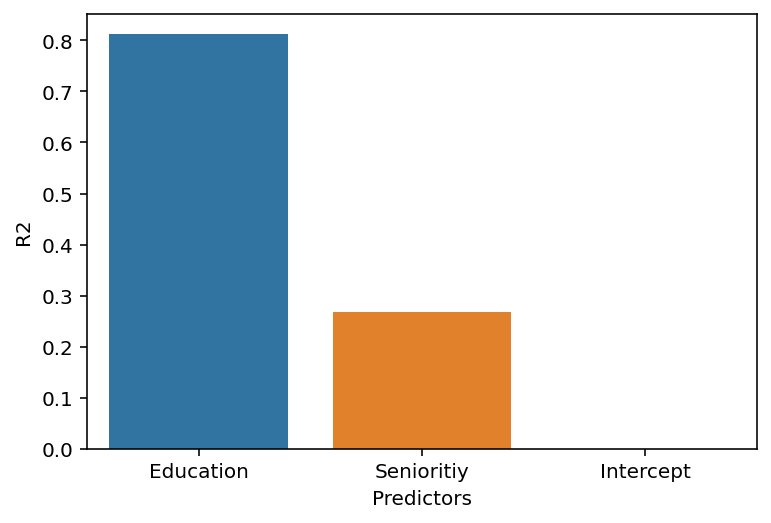

In [41]:
mod_intercept = smf.ols(data = df_income, formula = "Income ~ 1").fit()
df_r2 = pd.DataFrame({'R2': [mod_edu.rsquared, mod_seniority.rsquared,
                            mod_intercept.rsquared],
                     'Predictors': ['Education', 'Senioritiy', 'Intercept']})
sns.barplot(data = df_r2, x = "Predictors", y = "R2")

## The return of heteroscedasticity

### Review: Homoscedasticity

> **Homoscedasticity** means that the residuals are evenly distributed along the regression line.

- The opposite of homoscedasticity is **heteroscedasticity**.  

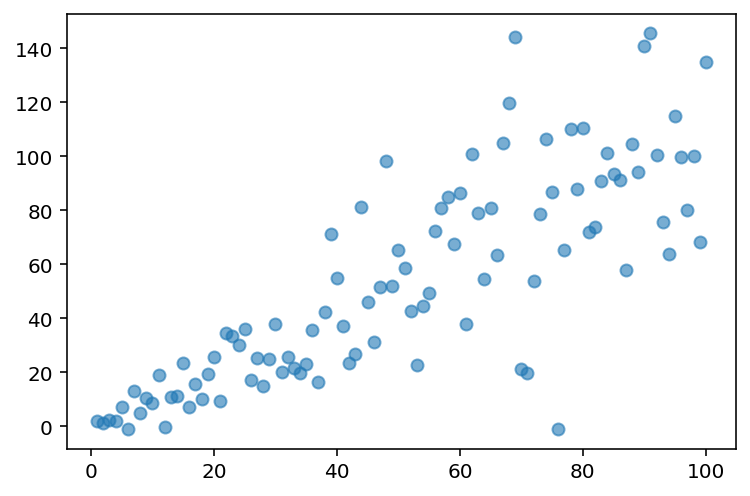

In [7]:
### This is an example of heteroscedasticity
np.random.seed(1)
X = np.arange(1, 101)
y = X + np.random.normal(loc = 0, scale = X/2, size = 100)
plt.scatter(X, y, alpha = .6)

#### Check-in

Why might heteroscedasticity pose a problem for our measures of **prediction error**, e.g., $S_{Y|X}$?

In [8]:
### Your answer here

### Heteroscedasticity and prediction error

> The **standard error of the estimate** gives us an estimate of how much prediction error to expect.

But with heteroscedasticity, our *error* is itself correlated with $X$. 

- Less error for *small* values of $X$.
- More error for *large* values of $X$.

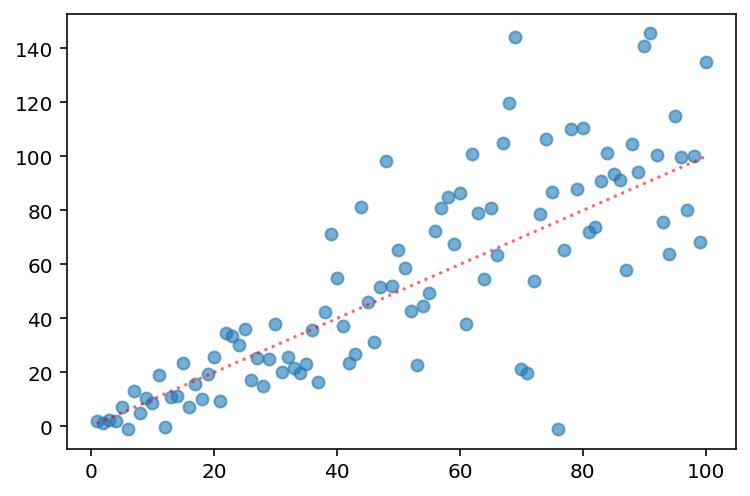

In [12]:
plt.scatter(X, y, alpha = .6)
plt.plot(X, X, linestyle = "dotted", color = "red", alpha = .6)

### Heteroscedasticity and $\beta$ SE

- Heteroscedasticity can also **bias** our estimates of the error associated with each coefficient.  
- Typically, this results in an **underestimate** of SE––potentially leading to **false positives**.  
- This is because calculating $SE$ *depends* on $S_{Y|X}$!

#### Calculating $SE(\beta)$

The formula for calculating the **standard error of our slope coefficient** is:

$SE(\beta_1) = \frac{S_{Y|X}}{\sqrt{SS_X}} = \sqrt{\frac{\frac{1}{n-2}RSS}{SS_X}}$

(You won't be required to know this––but adds important context!)

## Conclusion

- An important part of statistical modeling is **evaluating** our models, either by:
   - **Visual inspection**.  
   - Using **metrics** of predictive success.
- Metrics liks $S_{Y|X}$ depend on certain assumptions being met, like **homoscedasticity**.